# Equivalent Layer technique for estimating magnetization application for Montes Claros complex of Goias Alkaline Province (GAP)

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import pandas as pd

from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'MC_intrusion_EQL_magdirection.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Open a dictionary

In [6]:
results = dict()

#### Saving files

In [7]:
saved_files = []

## Loading real data for Montes claros complex

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

## Survey information

In [9]:
print 'Shape : (%.0f,%.0f)'% data['shape'] 
print 'Number of data: %.1f' % data['N']
print 'dx: %.1f m' % data['dx']
print 'dy: %.1f m ' % data['dy']

Shape : (55,32)
Number of data: 1787.0
dx: -319.8 m
dy: 471.0 m 


## Main field

In [10]:
inc_gf,dec_gf = data['main_field'][0],data['main_field'][1] 

In [11]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -19.5 degree
Main field declination: -18.5 degree


## Real data visualization for Montes Claros complex

/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


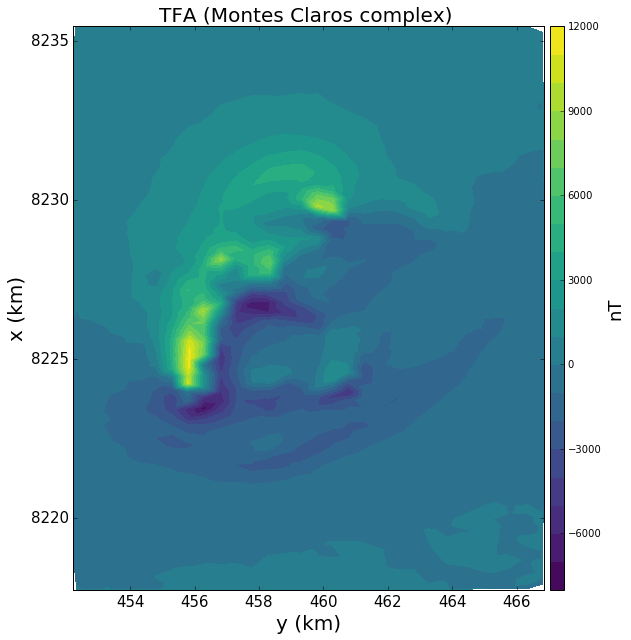

In [12]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.tricontourf(1e-3*data['y'],1e-3*data['x'],data['tfa_40'],20, cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.title('TFA (Montes Claros complex) ', fontsize=title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(labelsize=15)

file_name = 'figs/montes_claros_decimated_40'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

## Generating the layer with my function 

In [13]:
h = 640.

#### Generating a layer

In [14]:
xs = data['x']

In [15]:
ys = data['y']

In [16]:
zs = h*np.ones_like(xs)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [17]:
i_pos = 1500

In [18]:
it_max = 30

In [19]:
it_marq = 15

In [20]:
lamb = 10.
dlamb = 100.

In [21]:
eps_i = 1e-5
eps_e = 1e-5

In [22]:
mu_pos = 1e3

In [23]:
m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
    data['tfa_40'],data['x'],data['y'], data['z']
    ,xs,ys,zs,inc_gf,dec_gf,-71.,-23.,lamb,dlamb,i_pos,it_max, it_marq,eps_e,eps_i,mu_pos)

i = 0
2.77628958565e-13
-70.7065764398 -19.1589649156
0.00922870659702
i = 1
2.77548189088e-13
-70.3481804008 -15.4331834756
0.00952606507882
i = 2
2.77291048171e-13
-69.9282602225 -11.8496079564
0.00980046562446
i = 3
2.76857126989e-13
-69.4527808709 -8.43566232182
0.0100085588579
i = 4
2.76250573062e-13
-68.9308094981 -5.22547827721
0.0100531635149
i = 5
2.75482547381e-13
-68.3716137249 -2.23847876284
0.00995786218492
i = 6
2.74568301478e-13
-67.7865570116 0.511582772059
0.00969517233835
i = 7
2.73529539167e-13
-67.1867199059 3.02353294814
0.00929901985422
i = 8
2.72390439069e-13
-66.5816367279 5.30444555357
0.0088036605298
i = 9
2.71174973341e-13
-65.9756508671 7.37414378964
0.00831457024945
i = 10
2.69898912676e-13
-65.3751624107 9.31643439009
0.00782156075339
i = 11
2.68566640147e-13
-64.7804213456 11.0661881061
0.00729415136302
i = 12
2.67202453562e-13
-64.1944157655 12.64601381
0.00680803526428
i = 13
2.65818372284e-13
-63.6216118635 14.0695046788
0.00630557459521
i = 14
2.64430

2.16234339456e-13
-47.0089269822 31.670864528
2.05676806952e-05
i = 116
2.16143919102e-13
-46.9794688757 31.6784850513
1.96159180676e-05
i = 117
2.16055710942e-13
-46.9507144975 31.685844714
1.87088011446e-05
i = 118
2.1596965753e-13
-46.9226464114 31.6929539342
1.78441046304e-05
i = 119
2.15885703317e-13
-46.8952472413 31.699822391
1.70202903323e-05
i = 120
2.15803793428e-13
-46.8684968459 31.7064578154
1.6239220927e-05
i = 121
2.15723866882e-13
-46.8423752885 31.7128751463
1.54993259829e-05
i = 122
2.15645856929e-13
-46.8168653004 31.7190860105
1.47958557801e-05
i = 123
2.15569706954e-13
-46.7919519764 31.7250982117
1.41247258347e-05
i = 124
2.15495370106e-13
-46.7676207891 31.7309191835
1.34844311611e-05
i = 125
2.15422800817e-13
-46.7438576405 31.7365561296
1.28734759737e-05
i = 126
2.15351954826e-13
-46.7206488048 31.7420159527
1.22904836405e-05
i = 127
2.15282789094e-13
-46.6979809028 31.7473052433
1.17341594692e-05
i = 128
2.15215261741e-13
-46.6758408968 31.7524303036
1.1203265

### Visualization of the convergence

In [24]:
phi = (np.array(phi)/data['x'].size)

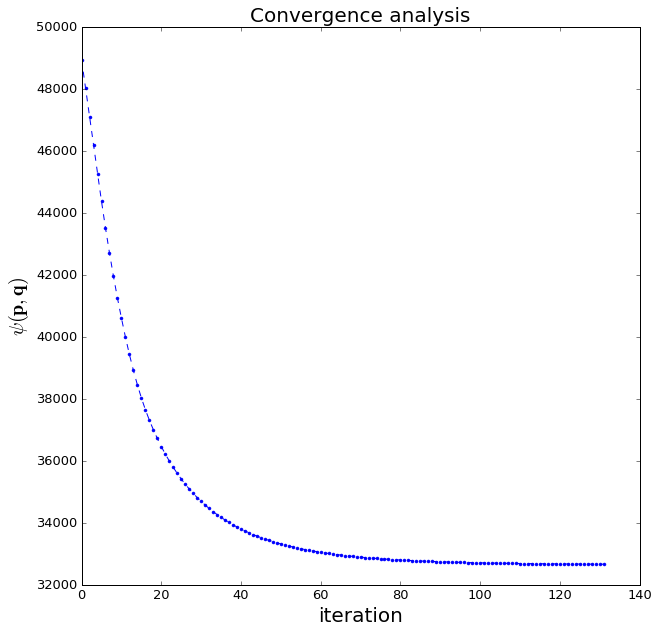

In [25]:
title_font = 20
bottom_font = 18
plt.close('all')
plt.figure(figsize=(8,8), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.plot(phi, 'b--')
plt.plot(phi, 'b.')

plt.title('Convergence analysis', fontsize=title_font)
plt.xlabel('iteration', fontsize = title_font)
plt.ylabel('$\psi (\mathbf{p}, \mathbf{q})$', fontsize = title_font)
plt.tick_params(labelsize=13)

file_name = 'figs/MC_complex_convergence_LM_NNLS'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

### Estimated magnetization direction

In [26]:
print (inc_est,dec_est)

(-46.633094081958859, 31.762211598130147)


### Comparison between observed data and predicted data

In [27]:
pred = fc.tfa_layer(data['x'],data['y'],data['z'],
                    xs,ys,zs,inc_gf,dec_gf,m_LM,inc_est,dec_est)

In [28]:
res = pred - data['tfa_40']

In [29]:
r_norm,r_mean,r_std = fc.residual(data['tfa_40'],pred)

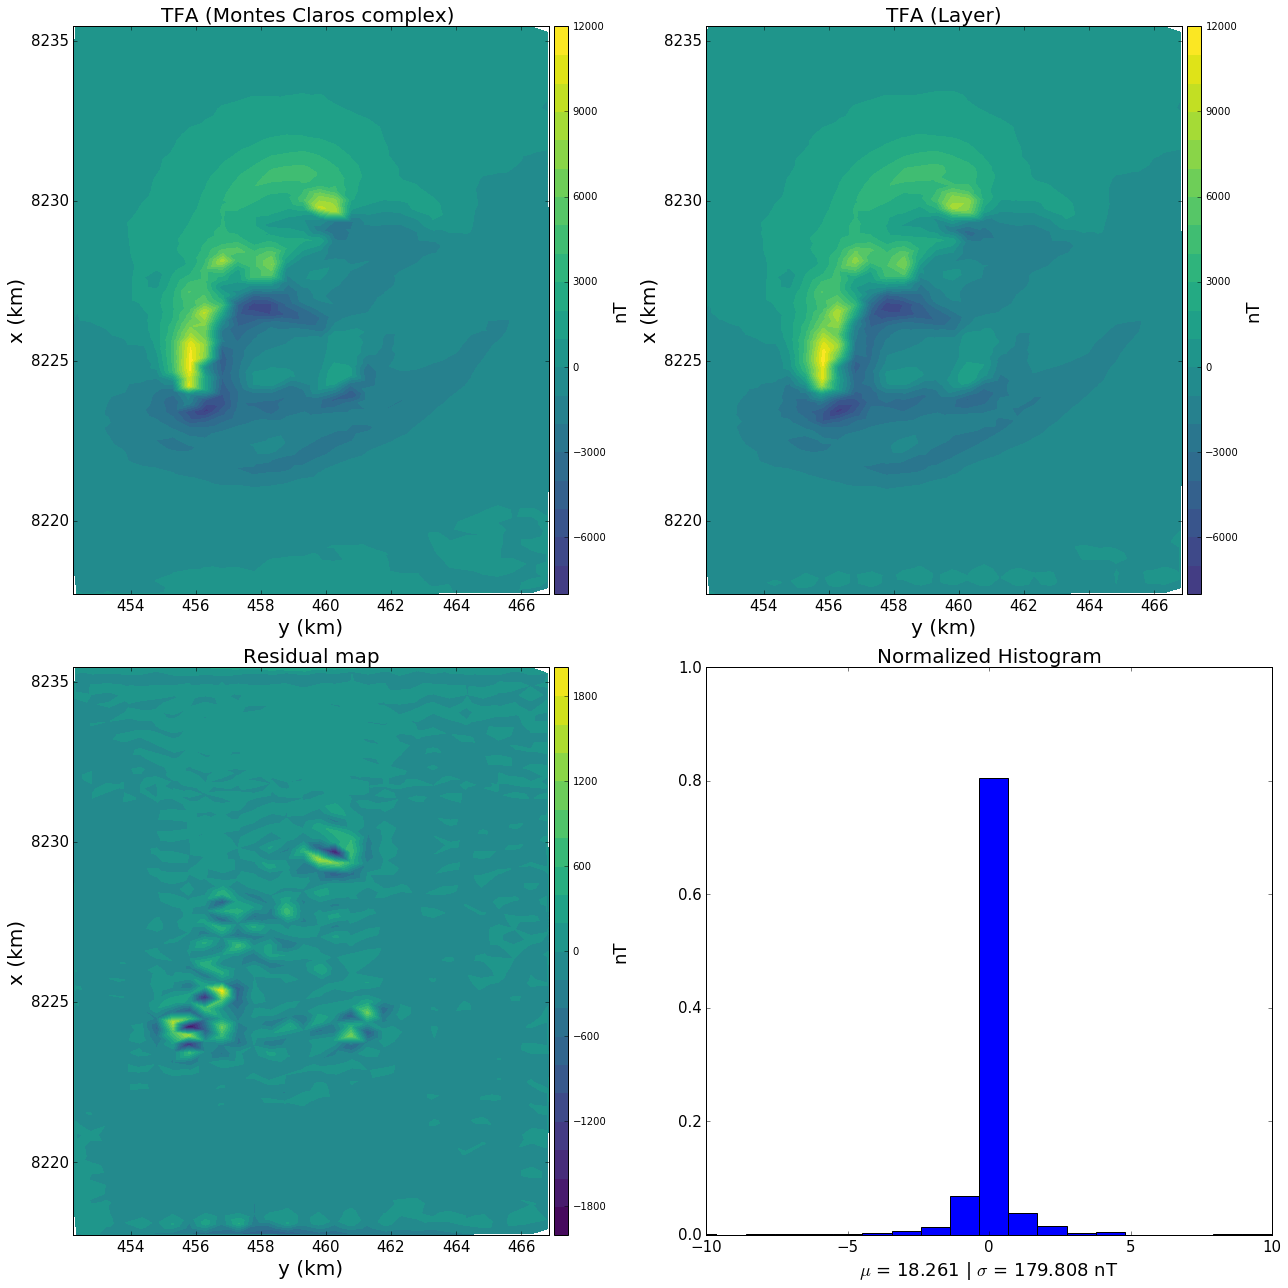

In [30]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(18,18), tight_layout=True)

ranges = saturation_factor*np.abs([data['tfa_40'].max(), 
                                   data['tfa_40'].min(),
                                   pred.max(), pred.min()]).max()

r_ranges = saturation_factor*np.abs([res.max(), res.min()]).max()

plt.subplot(2,2,1)
plt.tricontourf(1e-3*data['y'], 1e-3*data['x'], data['tfa_40'], 20, cmap='viridis',vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.title('TFA (Montes Claros complex) ', fontsize=title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(labelsize=15)

plt.subplot(2,2,2)
plt.tricontourf(1e-3*data['y'],1e-3*data['x'], pred, 20, cmap='viridis',  vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.title('TFA (Layer)', fontsize=title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(labelsize=15)

plt.subplot(2,2,3)
plt.tricontourf(1e-3*data['y'],1e-3*data['x'], res, 20, cmap='viridis',  vmin=-r_ranges, vmax=r_ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.title('Residual map', fontsize=title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(labelsize=15)


plt.subplot(2,2,4)
plt.xlabel('$\mu$ = %.3f | $\sigma$ = %.3f nT' % (r_mean, r_std),
           fontsize = bottom_font)
nbins = int((np.max(r_norm - np.min(r_norm))))
plt.hist(r_norm,bins=nbins,normed=True)
plt.ylim(0.,1.)
plt.xlim(-10., 10.)
plt.title('Normalized Histogram',fontsize=title_font)
plt.tick_params(labelsize=15)

file_name = 'figs/MC_complex_LM_NNLS'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

### Estimated magnetic moment within the layer

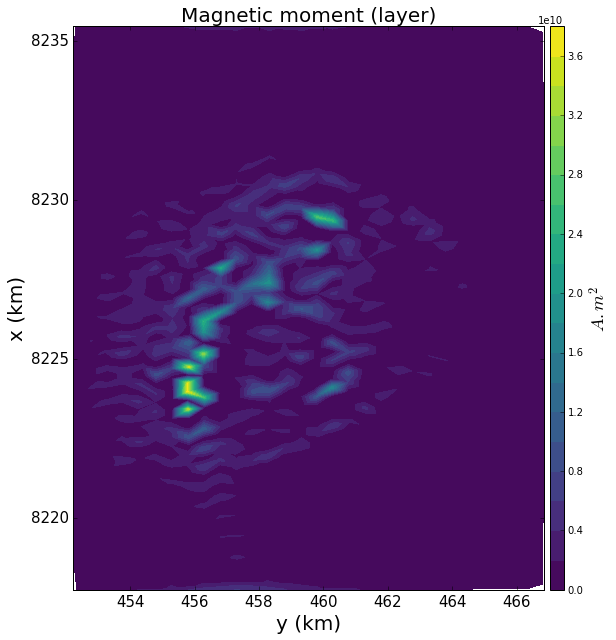

In [31]:
title_font = 20
bottom_font = 18
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.tricontourf(1e-3*ys,1e-3*xs,m_LM,20,cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('$A.m^2$',size=bottom_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.title('Magnetic moment (layer)', fontsize=title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(labelsize=15)

file_name = 'figs/MC_complex_moment_positive_LM_NNLS'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

### Reduction to the pole

In [32]:
G_rtp = fc.sensitivity_mag(data['x'],data['y'],data['z'],
                       xs,ys,zs,90.,0.,90.,0.)

In [33]:
tfa_rtp = np.dot(G_rtp,m_LM)

#### Visualization of a reduction to the pole

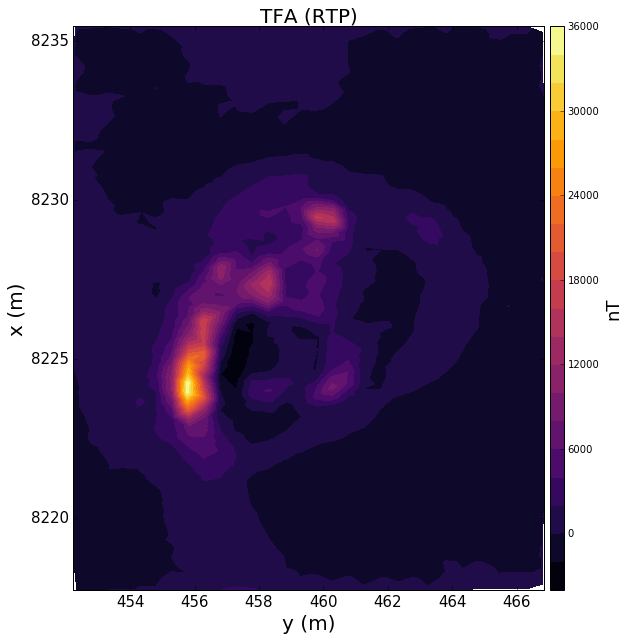

In [34]:
title_font = 20
bottom_font = 18
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.tricontourf(1e-3*data['y'], 1e-3*data['x'], tfa_rtp, 20, cmap='inferno')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('TFA (RTP)', fontsize=title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(labelsize=15)


file_name = 'figs/RTP_MC_complex_LM_NNLS'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

## Visualization of RTP and magnetic moment

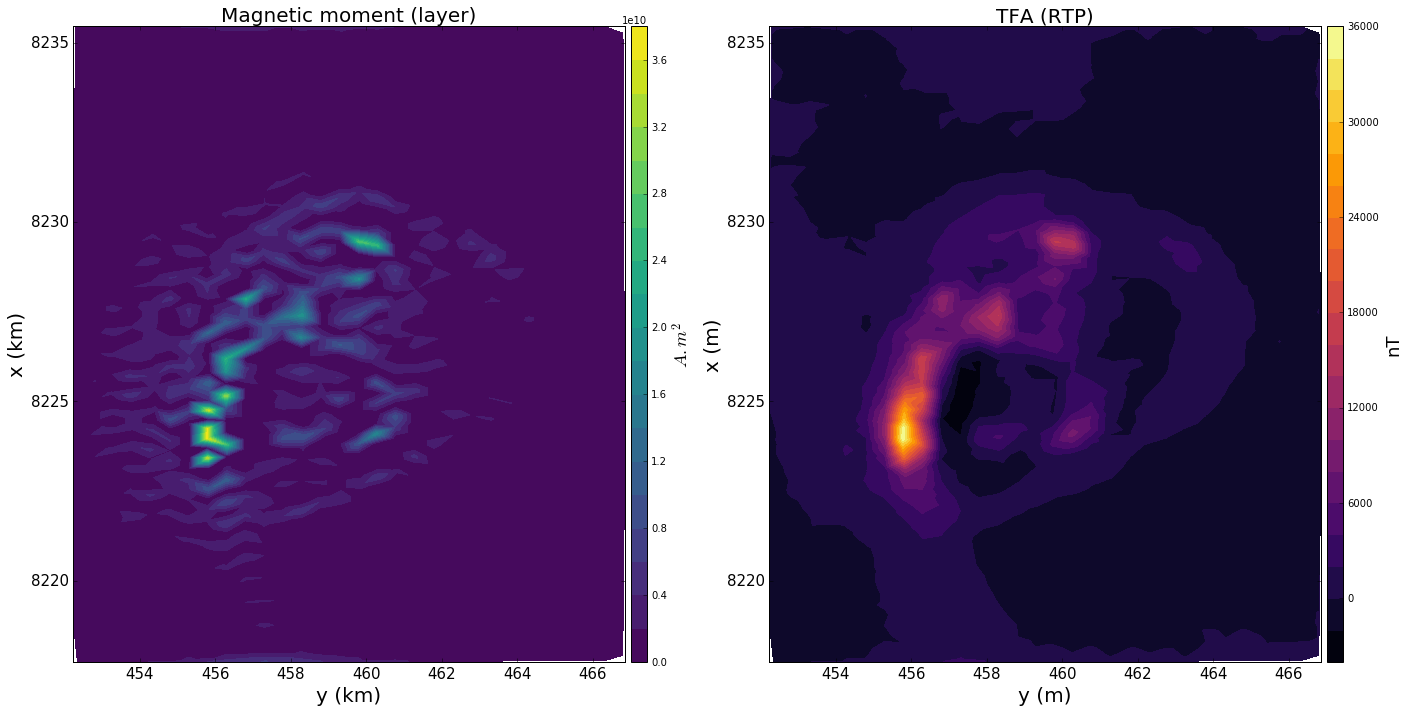

In [35]:
title_font = 20
bottom_font = 18
plt.close('all')
plt.figure(figsize=(20,10), tight_layout=True)

plt.subplot(1,2,1)
plt.tricontourf(1e-3*ys,1e-3*xs,m_LM,20,cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('$A.m^2$',size=bottom_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.title('Magnetic moment (layer)', fontsize=title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(labelsize=15)

plt.subplot(1,2,2)
plt.tricontourf(1e-3*data['y'], 1e-3*data['x'], tfa_rtp, 20, cmap='inferno')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('TFA (RTP)', fontsize=title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(labelsize=15)

file_name = 'figs/moment_RTP_MC_complex_LM_NNLS'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()